Flowchart to help make decisions based on previous experience

    Age  Experience  Rank Nationality   Go
0    36          10     9          UK   NO
1    42          12     4         USA   NO
2    23           4     6           N   NO
3    52           4     4         USA   NO
4    43          21     8         USA  YES
5    44          14     5          UK   NO
6    66           3     7           N  YES
7    35          14     9          UK  YES
8    52          13     7           N  YES
9    35           5     9           N  YES
10   24           3     5         USA   NO
11   18           3     7          UK  YES
12   45           9     9          UK  YES
    Age  Experience  Rank  Nationality  Go
0    36          10     9            0   0
1    42          12     4            1   0
2    23           4     6            2   0
3    52           4     4            1   0
4    43          21     8            1   1
5    44          14     5            0   0
6    66           3     7            2   1
7    35          14     9            0   1
8    52    

[Text(0.4, 0.9, 'Rank <= 6.5\ngini = 0.497\nsamples = 13\nvalue = [6, 7]'),
 Text(0.2, 0.7, 'gini = 0.0\nsamples = 5\nvalue = [5, 0]'),
 Text(0.30000000000000004, 0.8, 'True  '),
 Text(0.6, 0.7, 'Nationality <= 0.5\ngini = 0.219\nsamples = 8\nvalue = [1, 7]'),
 Text(0.5, 0.8, '  False'),
 Text(0.4, 0.5, 'Age <= 35.5\ngini = 0.375\nsamples = 4\nvalue = [1, 3]'),
 Text(0.2, 0.3, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.6, 0.3, 'Age <= 40.5\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.4, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.8, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.8, 0.5, 'gini = 0.0\nsamples = 4\nvalue = [0, 4]')]

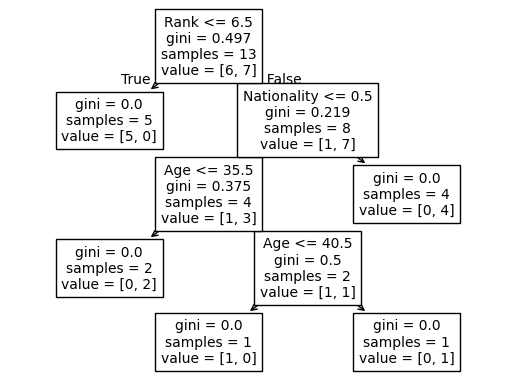

In [3]:
#importing data
import pandas as pd
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
df= pd.read_csv('comedy_show_data.csv')

print(df)

#changing string values to numerical values
d={'UK':0, 'USA':1, 'N':2}
df['Nationality']=df['Nationality'].map(d)
d={'YES':1,'NO':0}
df['Go']=df['Go'].map(d)

print(df)

#seperate feature columns and target columns
features=['Age','Experience','Rank','Nationality']
target=['Go']

X=df[features]
y=df[target]

dtree = DecisionTreeClassifier()
dtree=dtree.fit(X,y)

tree.plot_tree(dtree,feature_names=features)




From the tree:

If Rank ≤ 6.5 → Go = 0 (No).

Else (Rank > 6.5):

If Nationality ≤ 0.5 → check Age:

Age ≤ 35.5 → Go = 1 (Yes)

35.5 < Age ≤ 40.5 → Go = 0 (No)

Age > 40.5 → Go = 1 (Yes)

If Nationality > 0.5 → Go = 1 (Yes).

Gini impurity tells us how “mixed” the classes are in a set of samples.

A Gini of 0.0 means pure (all Yes or all No).

The closer it is to 0.5, the more mixed the classes are.

At each split, the algorithm chooses the feature and threshold that produces the largest drop in Gini impurity (i.e., makes the groups purer).

All No OR all Yes → Gini = 0 (perfectly pure, no confusion).

Half No / Half Yes → Gini = 0.5 (maximum confusion).

Anything in between → Gini somewhere between 0 and 0.5, depending on how lopsided the split is.
